#Lista 1

Nome do aluno: Kleber Vasconcelos Oliveira Junior

<h1> Questões teoricas</h1>

### 1. Descreva como um cientista de dados aproveita das técnicas da Descoberta de Aprendizado em Base de dados(KDD). Ainda, explique como um especialista atua junto nesse processo da ciência de dados e como um conhecimento aprofundado do cientista pode auxiliar nesse processo. (1,5 pontos)


O cientista de dados utiliza KDD para extrair padrões úteis de grandes conjuntos de dados. O especialista contribui com conhecimento de domínio, e o entendimento aprofundado do cientista é crucial para escolher algoritmos e interpretar resultados.

### 2. Explique o que é Big Data e como a ciência de dados se relaciona com ela. Existe uma diferença significativa do que é considerado Big Data hoje com uma análise de dados grandes de 2005, por exemplo? Descreva como e cite 2 exemplos práticos. (1,5 pontos)

Big Data são conjuntos de dados complexos e volumosos. Em comparação com 2005, há mais volume, velocidade e variedade nos dados sendo estes gerados e potencializados pelos recuros de IoT e o uso da internet de forma geral.

### 3. Qual a ligação entre inteligência artificial e ciência de dados? (1,0 ponto)

Ciência de Dados faz uso de algoritmos de Inteligência artificial com a proposta de extrair informações de um conjunto de dados.

### 4. Em que áreas a ciência de dados pode atuar? Cite 2 exemplos aplicados. (0,5 ponto)

Área jurídica: análise de textos de pareceres de um tribunal de justiça para mensurar a coerência das decisões.

Área médica: análise epidemiológicas para prevenção de surtos de doenças.


### 5. Mostre grandes marcos na área de Ciência de Dados nos últimos anos. (0,5 ponto)

Avanços em Aprendizado Profundo impulsionam reconhecimento de imagem e processamento de linguagem natural. A ênfase crescente na ética destaca preocupações sobre privacidade e interpretabilidade dos dados.

<h1> Questões praticas</h1>

<h1> Carregando a base de dados</h1>

Para esse exercício a base de dados utilizada vai ser a iris que já vem no biblioteca sklearn, as células a seguir carrega a base de dados e mostra alguns gráficos, nesse momento o objetivo é apenas dá uma ideia do comportamento da base de dados para o aluno e não será cobrado nenhuma questão para desenhar gráficos ou carregar a base de dados.

In [63]:
from  sklearn import  datasets
from sklearn.model_selection import train_test_split

#Carrega a base de dados iris direto do pacote sklearn
iris=datasets.load_iris()

#Define nossos x e y que serão utilizados nos exercicios seguintes
x = iris.data
y = iris.target

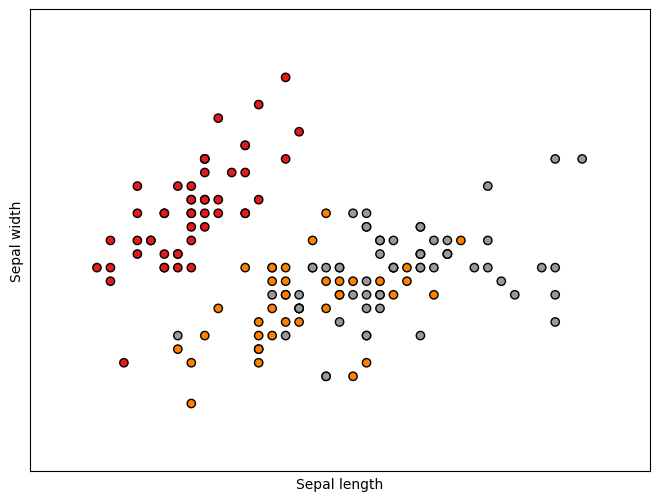

In [64]:
import matplotlib.pyplot as plt
from sklearn import datasets

X = iris.data[:, :2]
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA


fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
# ax.axis.set_ticklabels([])

plt.show()

<Figure size 800x600 with 0 Axes>

<h1> Hiperparâmetro </h1>

Os hiperparâmetros são parâmetros ajustáveis que permitem controlar o processo de treinamento do modelo, alguns algoritmos têm seu desempenho severamente afetado dependendo do hiperparâmetro escolhido, para escolhermos o melhor hiperparâmetro para o nosso algoritmo no nosso caso podemos utilizar as  métricas de avaliação e medir seu desempenho para cada hiperparâmetro e escolher o que tiver a melhor performance.

<h1>Complete o código a seguir  (1 ponto)</h1>

Complete o código inserindo o KNN com um K variante e avalie o desempenho para cada valor de K.
    
Os seguintes links podem ser úteis:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


for i in range(2, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y)
    scores = knn.score(X, y)
    print("K =", i, "\t\t Score =", scores)

K = 2 		 Score = 0.8466666666666667
K = 4 		 Score = 0.8266666666666667
K = 6 		 Score = 0.8333333333333334
K = 8 		 Score = 0.8133333333333334
K = 10 		 Score = 0.8466666666666667
K = 12 		 Score = 0.8333333333333334
K = 14 		 Score = 0.8266666666666667
K = 16 		 Score = 0.8266666666666667
K = 18 		 Score = 0.8
K = 20 		 Score = 0.7866666666666666
K = 22 		 Score = 0.8
K = 24 		 Score = 0.8066666666666666
K = 26 		 Score = 0.8133333333333334
K = 28 		 Score = 0.8133333333333334


<h1> Clusterização </h1>

O clustering ou análise de agrupamento de dados é o conjunto de técnicas de prospecção de dados (data mining) que visa fazer agrupamentos automáticos de dados segundo o seu grau de semelhança. Diferente da classificação a clusterização não tem a label que nós utilizamos como y até agora, então para avaliar ela precisamos de uma nova métrica que utilize apenas os dados do nosso X uma das métricas mais utilizadas é o Silhouette.

<h1> Complete o código a seguir (1,5 pontos)</h1>

Complete o código a seguir inserindo o KMeans dentro do laço for  e o silhouette_score para avaliar o desempenho do KMeans para cada número de cluster.

Os seguintes links podem ser  úteis:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

In [67]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import  silhouette_score


for i in range(2, 11):
    kmeans_model = KMeans(n_clusters=i, random_state=42, n_init="auto").fit(X)
    labels = kmeans_model.labels_
    score = silhouette_score(X, labels)
    print("K =", i, "\t\t Score =", score)

K = 2 		 Score = 0.4644681851183547
K = 3 		 Score = 0.4450525692083638
K = 4 		 Score = 0.4028471317296809
K = 5 		 Score = 0.34312790770010887
K = 6 		 Score = 0.3901380642183856
K = 7 		 Score = 0.4013232244605618
K = 8 		 Score = 0.38847422344012994
K = 9 		 Score = 0.37265574788548234
K = 10 		 Score = 0.4023683501385767


<h1> Questão livre (0,5 ponto)</h1>

Descreva as principais coisas que você aprendeu com essa lista, além de possíveis dúvidas e dificuldades enfrentadas

Resposta: Olhando para os algoritmos utilizados, nem sempre o maior número de vizinhos ou clusters vai nos trazer um melhor resultado. Logo, uma análise é fundamental, para extraírmos o máximo de eficiêcia.


#Primeira parte do Projeto (2 pontos)

Com base nos conhecimentos adquiridos nas aulas e da Lista 1, faça os seguintes passos sobre o conjunto de dados (link abaixo):

* Faça pré-processamento;
* Use técnicas de Estatísticas;
* Escolha algum algoritmo de classificação;
* Use alguma técnica de avaliação do modelo;
* Tire alguns ideias (insights) e mostre conclusões.


Utilize o conjunto de dados:
https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

Caso não consiga baixar pelo link anterior:
https://drive.google.com/file/d/1kRjGWRmOIk2FVlP0Bgch7TNnI3jpJU5Q/view

Obs: Tudo que for feito nessa parte é para o projeto final da disciplina.


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler

In [69]:
df = pd.read_csv('../datasets/hotel_bookings.csv')

<h2>Data Analysis</h2>

In [70]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [71]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [73]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [74]:
df['country'].fillna('PRT',inplace=True)
df.fillna(0,inplace=True)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [75]:
#Preparing the people information, tagging adults, children and babies
filtered_people = (df.children == 0) & (df.babies == 0) & (df.adults == 0)
df[filtered_people]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [76]:
#Calculating the percentage of cancelations
cancelations = len(df[df['is_canceled'] == 1])
print("Percentage cancelation= ", cancelations/len(df)*100)
df['reservation_status'].value_counts(normalize=True) * 100

Percentage cancelation=  37.041628277075134


reservation_status
Check-Out    62.958372
Canceled     36.030656
No-Show       1.010972
Name: proportion, dtype: float64

<h3>Normalization</h3>

In [77]:
columns = [
    'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number',
    'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations',
    'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
    'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests'
]

# Crie um objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajuste e transforme as colunas selecionadas
df[columns] = scaler.fit_transform(df[columns])

In [78]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,0.464043,0.0,July,0.5,0.0,0.0,0.00,0.036364,...,No Deposit,0.000000,0.0,0.0,Transient,0.001180,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0.0,1.000000,0.0,July,0.5,0.0,0.0,0.00,0.036364,...,No Deposit,0.000000,0.0,0.0,Transient,0.001180,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0.0,0.009498,0.0,July,0.5,0.0,0.0,0.02,0.018182,...,No Deposit,0.000000,0.0,0.0,Transient,0.015053,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0.0,0.017639,0.0,July,0.5,0.0,0.0,0.02,0.018182,...,No Deposit,0.568224,0.0,0.0,Transient,0.015053,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0.0,0.018996,0.0,July,0.5,0.0,0.0,0.04,0.036364,...,No Deposit,0.448598,0.0,0.0,Transient,0.019307,0.0,0.2,Check-Out,2015-07-03


 <h3>EDA</h3>

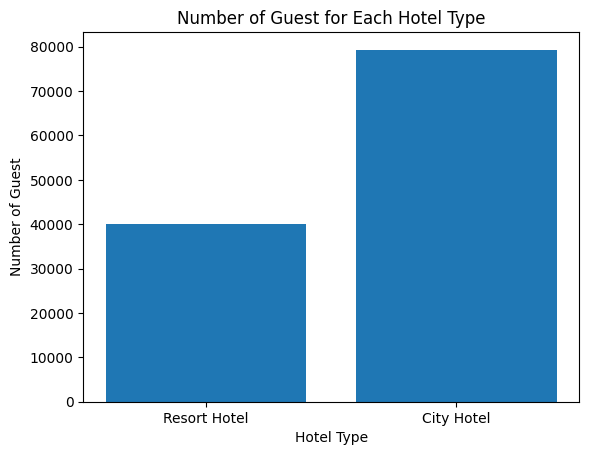

In [79]:
resort_len= len(df[df['hotel']=='Resort Hotel'])
city_len=len(df[df['hotel']=='City Hotel'])

hotel_types = ['Resort Hotel', 'City Hotel']
lengths = [resort_len, city_len]

plt.bar(hotel_types, lengths)
plt.xlabel('Hotel Type')
plt.ylabel('Number of Guest')
plt.title('Number of Guest for Each Hotel Type')
plt.show()

In [80]:
#Splitting guest by country
country_data = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_data.columns = ['country', 'guest number']
country_data

,country,guest number
0,PRT,21492
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


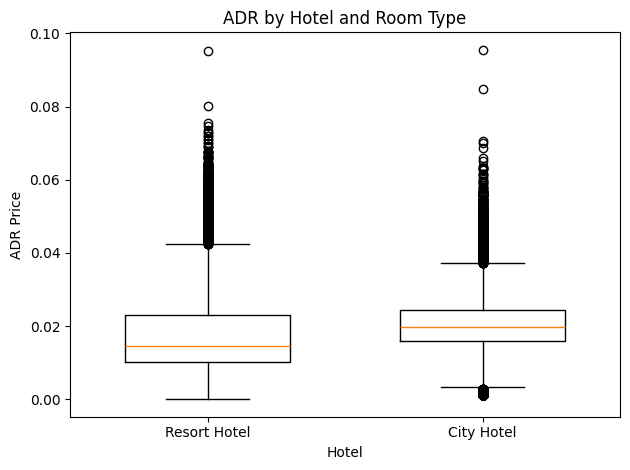

In [81]:
 
# Filter to only non-canceled bookings
df2 = df[df['is_canceled'] == 0] 

# Get list of unique hotels
hotels = df2['hotel'].unique()

# Create figure and axes
fig, ax = plt.subplots()

# Plot adr prices by room type for each hotel
for i, hotel in enumerate(hotels):
    data = df2[df2['hotel'] == hotel]['adr']
    ax.boxplot(data, positions=[i], widths=0.6)

# Set x ticks with hotel names  
ax.set_xticks(range(len(hotels)))
ax.set_xticklabels(hotels)

# Other customizations  
ax.set_xlabel('Hotel')
ax.set_ylabel('ADR Price')
ax.set_title('ADR by Hotel and Room Type')
plt.tight_layout()

plt.show()


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Separate features and target
X = df.drop(['is_canceled'], axis=1) 
y = df['is_canceled']

df['hotel'] = df['hotel'].replace({'Resort Hotel': 0, 'City Hotel': 1})
 
X = df[['hotel', 'babies', 'children']]
y = df['is_canceled']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the classifier
clf.fit(X_train, y_train) 

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6242566379093727
